In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# IMPORTING REQUIRED PACKAGES

In [ ]:
import pandas as pd 


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ElectricityTheft/ElectricityTheft.csv")

In [ ]:
df.shape

(17566, 6)

In [ ]:
print(df)

       disrict           client_id  client_catg  region creation_date  label
0           60      train_Client_0           11     101    31-12-1994      0
1           69      train_Client_1           11     107    29-05-2002      0
2           62     train_Client_10           11     301    13-03-1986      0
3           69    train_Client_100           11     105    11-07-1996      0
4           62   train_Client_1000           11     303    14-10-2014      0
...        ...                 ...          ...     ...           ...    ...
17561       69  train_Client_99921           11     103    06-05-2016      1
17562       69  train_Client_99947           12     103    17-11-2006      1
17563       62  train_Client_99954           11     310    23-06-1987      1
17564       69  train_Client_99980           11     103    03-06-2013      1
17565       63  train_Client_99982           11     379    21-11-1995      1

[17566 rows x 6 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.fillna(0, inplace = True)
le = LabelEncoder()

#Converting non-numeric data to numeric
df['client_id'] = pd.Series(le.fit_transform(df['client_id'].astype(str)))

#Converting an object into int variable
df['label'] = df['label'].astype('uint8')

#drop irrelevent columns
df.drop(['creation_date'], axis = 1,inplace=True)

In [ ]:
sizes = df['label'].value_counts(sort=1)
print(sizes)

0    10000
1     7566
Name: label, dtype: int64


In [ ]:
df

,disrict,client_id,client_catg,region,label
0,60,0,11,101,0
1,69,1,11,107,0
2,62,2,11,301,0
3,69,3,11,105,0
4,62,4,11,303,0
...,...,...,...,...,...
17561,69,17561,11,103,1
17562,69,17562,12,103,1
17563,62,17563,11,310,1
17564,69,17564,11,103,1


# BASIC EXPLORATORY ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


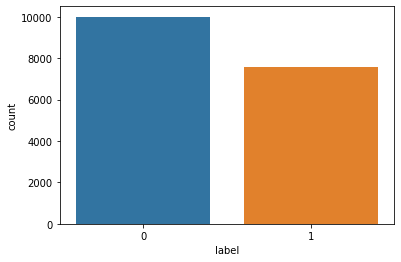

In [ ]:
                                                            #visualize the count 
import seaborn as sns                                        #Seaborn is a library that uses Matplotlib underneath to plot graphs. It used to visualize random distributions.
sns.countplot(df['label'], label = 'count')


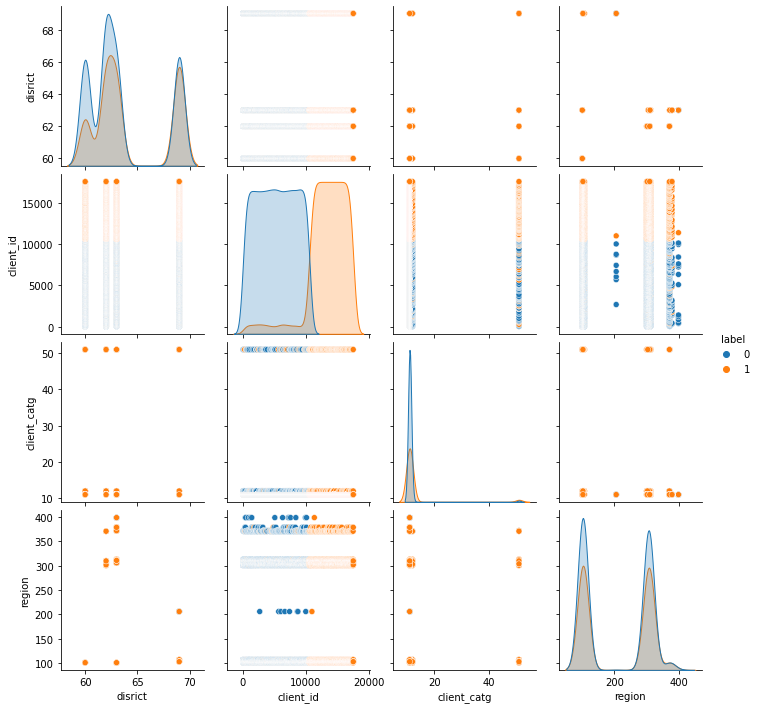

In [ ]:
                                                                                                                       #create a pair  plot
sns.pairplot(df.iloc[:,0:6], hue = 'label')                                                                           #It is used to plot multiple pairwise bivariate distributions in a dataset 

In [ ]:
#print the first 5 rows of new data
df.head(5)

,disrict,client_id,client_catg,region,label
0,60,0,11,101,0
1,69,1,11,107,0
2,62,2,11,301,0
3,69,3,11,105,0
4,62,4,11,303,0


In [ ]:
#import numpy as np                     #NumPy is a Python library used for working with arrays

In [ ]:
#get the correlation of the columns
df.iloc[:,0:6].corr()

,disrict,client_id,client_catg,region,label
disrict,1.000000,0.086376,0.073791,-0.386598,0.108865
client_id,0.086376,1.000000,0.071233,0.023584,0.789030
client_catg,0.073791,0.071233,1.000000,-0.055850,0.096684
region,-0.386598,0.023584,-0.055850,1.000000,0.023483
label,0.108865,0.789030,0.096684,0.023483,1.000000


In [ ]:
from matplotlib import pyplot as plt   #matplotlib. pyplot is a module in Matplotlib it is mainly used for basic plotting.

correlation matrix, which is used to investigate the dependence between multiple variables at the same time

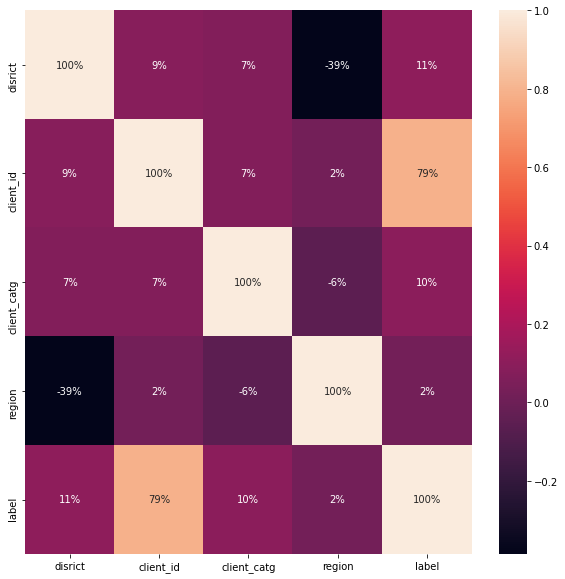

In [ ]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:6].corr(), annot=True, fmt= '.0%')

# DATA SPLITTING

Data splitting is the act of partitioning available data into. two portions. One portion of the data is used to develop a predictive model. and the other to evaluate the model's performance.

In [ ]:
#Define dependent variable
Y = df['label'].values

In [ ]:
#Define independent variables
X = df.drop(labels=['label'],axis=1)

In [ ]:
#Split data into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=20)
print(X_train)

       disrict  client_id  client_catg  region
11182       63      11182           11     306
4605        63       4605           11     313
3681        62       3681           11     301
14461       69      14461           11     107
16672       62      16672           11     301
...        ...        ...          ...     ...
1607        60       1607           11     101
3915        62       3915           11     309
14729       69      14729           11     107
4367        62       4367           11     307
15715       60      15715           11     101

[13174 rows x 4 columns]


In [ ]:
x_test = X_test.values
print(X_test)

       disrict  client_id  client_catg  region
11908       69      11908           11     104
1807        69       1807           11     104
13234       69      13234           11     103
13736       69      13736           11     104
6304        60       6304           11     101
...        ...        ...          ...     ...
14272       62      14272           11     307
417         63        417           11     306
3481        60       3481           11     101
3789        69       3789           11     107
11279       69      11279           11     105

[4392 rows x 4 columns]


In [ ]:
import pandas as pd
df = df.replace('[^\d.]','', regex=True).astype(float)

In [ ]:
df.dtypes


disrict        float64
client_id      float64
client_catg    float64
region         float64
label          float64
dtype: object

 StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() 
X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)
 
X_train

array([[-0.23535149,  0.46771774, -0.15320013,  0.94446947],
       [-0.23535149, -0.82670494, -0.15320013,  1.01148455],
       [-0.52848947, -1.00855784, -0.15320013,  0.89660156],
       ...,
       [ 1.52347643,  1.16580459, -0.15320013, -0.96067349],
       [-0.52848947, -0.87354584, -0.15320013,  0.95404306],
       [-1.11476544,  1.35985975, -0.15320013, -1.01811499]])

In [ ]:
#Create a function for models
def models(X_train, Y_train):
  #logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=30)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0,max_depth=2)
  tree.fit(X_train, Y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 30)
  forest.fit(X_train, Y_train)
   
  #print the models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, tree, forest

In [ ]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9374525580689237
[1]Decision Tree Classifier Training Accuracy: 0.9652345529072416
[2]Random Forest Classifier Training Accuracy: 0.9918020343100046


In [ ]:
#test the model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
 
for i in range(len(model)):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)
  print('Testing Accuracy = ', (TP + TN) / (TP + TN + FN + FP))
  print()

Model  0
[[2372  161]
 [ 128 1731]]
Testing Accuracy =  0.9341985428051002

Model  1
[[2506   27]
 [ 136 1723]]
Testing Accuracy =  0.9628870673952641

Model  2
[[2432  101]
 [ 133 1726]]
Testing Accuracy =  0.9467213114754098



In [ ]:
#show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range( len(model) ):
  print('Model', i)
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2533
           1       0.91      0.93      0.92      1859

    accuracy                           0.93      4392
   macro avg       0.93      0.93      0.93      4392
weighted avg       0.93      0.93      0.93      4392

0.9341985428051002

Model 1
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2533
           1       0.98      0.93      0.95      1859

    accuracy                           0.96      4392
   macro avg       0.97      0.96      0.96      4392
weighted avg       0.96      0.96      0.96      4392

0.9628870673952641

Model 2
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2533
           1       0.94      0.93      0.94      1859

    accuracy                           0.95      4392
   macro avg       0.95      0.94      0.95      4392
weighted a

In [ ]:

!pip install emoji --upgrade
import emoji

     |████████████████████████████████| 133kB 6.9MB/s 


#PREDICTION USING RANDOM FOREST

In [ ]:
#Print the prediction of Random Classifier Model
pred = model[2].predict(X_test)
for i in range(0,len(pred)):
  if pred[i]==1:
    print(emoji.emojize('Electricity Theft detected 1  :thumbsup:', use_aliases=True))
    print("Client_id : ",x_test[i][1])
    print()
    
  else:
    print(emoji.emojize('Electricity Theft not found 0 :thumbsdown:', use_aliases=True)) 
    
    print()
#print(Y_test)

Streaming output truncated to the last 5000 lines.
Electricity Theft detected 1  👍
Client_id :  15229

Electricity Theft not found 0 👎

Electricity Theft detected 1  👍
Client_id :  10813

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft detected 1  👍
Client_id :  15015

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft detected 1  👍
Client_id :  16499

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft detected 1  👍
Client_id :  13777

Electricity Theft detected 1  👍
Client_id :  12358

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft not found 0 👎

Electricity Theft detected 1  👍
Client_id :  13722

Electricity Theft not found 0 👎

Electricity Theft detected 1  👍
Client_id :  15041

Electricity Theft detected 1  👍
Client

In [ ]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(Y_test, pred))

Accuracy =  0.9467213114754098


What parameters are contributing the best

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 30)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

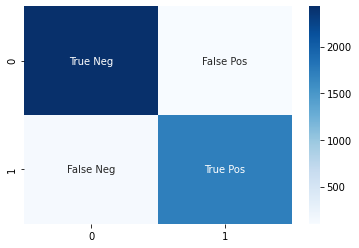

In [ ]:
import numpy as np

from sklearn.metrics import plot_confusion_matrix
cf_matrix = confusion_matrix(Y_test, pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)



sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [ ]:
 print(forest.feature_importances_)


[0.00630174 0.98020393 0.00385823 0.0096361 ]


In [ ]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": forest.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
1,client_id,0.980204
3,region,0.009636
0,disrict,0.006302
2,client_catg,0.003858


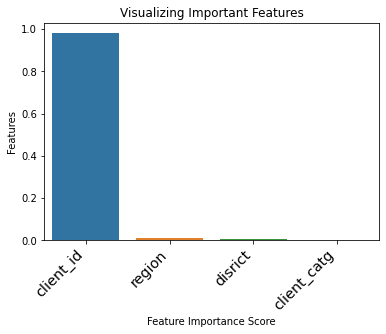

In [ ]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()




> Which means client_id is giving best split of input data.



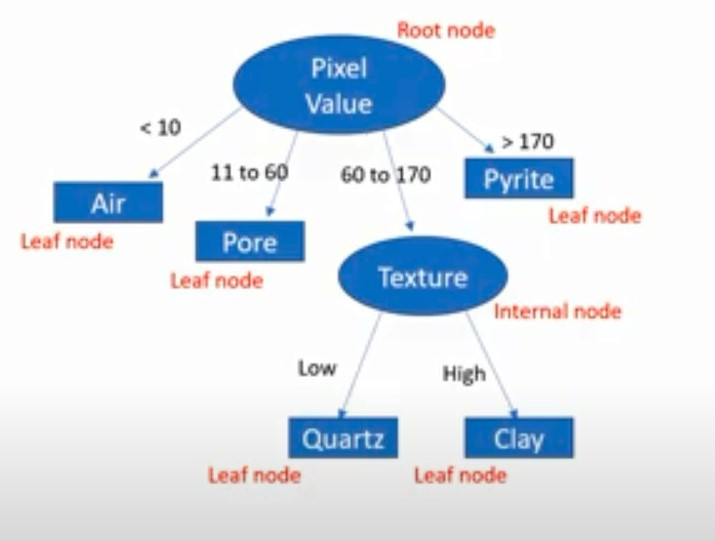